<a href="https://colab.research.google.com/github/dorobat-diana/LicentaAi/blob/main/MobileNetV2_FamousPlacesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check for CUDA available.

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


GPU Available: False
GPU Name: No GPU


Mount Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths to your train and test directories
train_dir = '/content/drive/MyDrive/ColabNotebooks/data/famous_places/train'
test_dir = '/content/drive/MyDrive/ColabNotebooks/data/famous_places/test'

# Set image size and batch size
img_size = (224, 224)  # MobileNetV2 accepts 224x224 images
batch_size = 32

# Create ImageDataGenerators for data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to [0,1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # Don't shuffle for evaluation
)

# Load MobileNetV2 without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model by adding custom layers on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global pooling layer
    layers.Dense(1024, activation='relu'),  # Fully connected layer with 1024 neurons
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Multi-class classification loss
    metrics=['accuracy']
)

# Set up early stopping and model checkpointing to avoid overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fine-tune the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs based on your results
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Found 3050 images belonging to 50 classes.
Found 3050 images belonging to 50 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.0429 - loss: 4.0802 

96/96 ━━━━━━━━━━━━━━━━━━━━ 2812s 29s/step - accuracy: 0.0433 - loss: 4.0774 - val_accuracy: 0.3652 - val_loss: 3.0780
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2561 - loss: 3.0488

96/96 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.2566 - loss: 3.0471 - val_accuracy: 0.5754 - val_loss: 2.3124
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4060 - loss: 2.4082

96/96 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.4062 - loss: 2.4072 - val_accuracy: 0.6475 - val_loss: 1.7871
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5332 - loss: 1.9227

96/96 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.5332 - loss: 1.9221 - val_accuracy: 0.6934 - val_loss: 1.4624
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5714 - loss: 1.6709

96/96 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.5715 - loss: 1.6705 - val_accuracy: 0.7233 - val_loss: 1.2794
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6277 - loss: 1.4745

96/96 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.6277 - loss: 1.4742 - val_accuracy: 0.7354 - val_loss: 1.1476
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6685 - loss: 1.3034

96/96 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.6683 - loss: 1.3034 - val_accuracy: 0.7557 - val_loss: 1.0455
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6703 - loss: 1.2500

96/96 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.6704 - loss: 1.2497 - val_accuracy: 0.7564 - val_loss: 0.9831
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6705 - loss: 1.1914

96/96 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.6707 - loss: 1.1909 - val_accuracy: 0.7652 - val_loss: 0.9516
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7129 - loss: 1.0750

96/96 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.7129 - loss: 1.0749 - val_accuracy: 0.7741 - val_loss: 0.8940
96/96 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7512 - loss: 0.9873
Test accuracy: 77.41%


Plot Training & Validation Accuracy/Loss

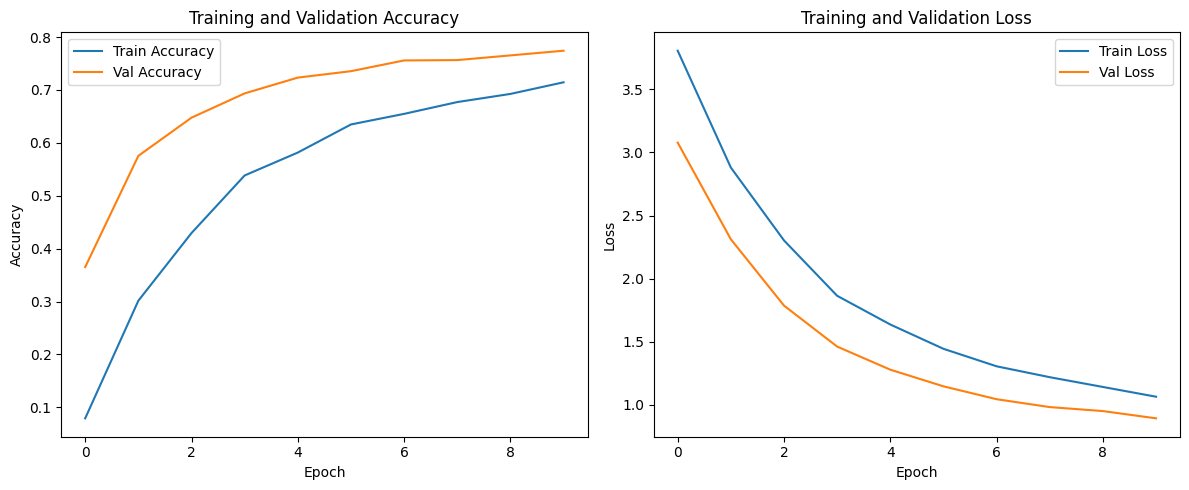

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


2. Confusion Matrix

96/96 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step


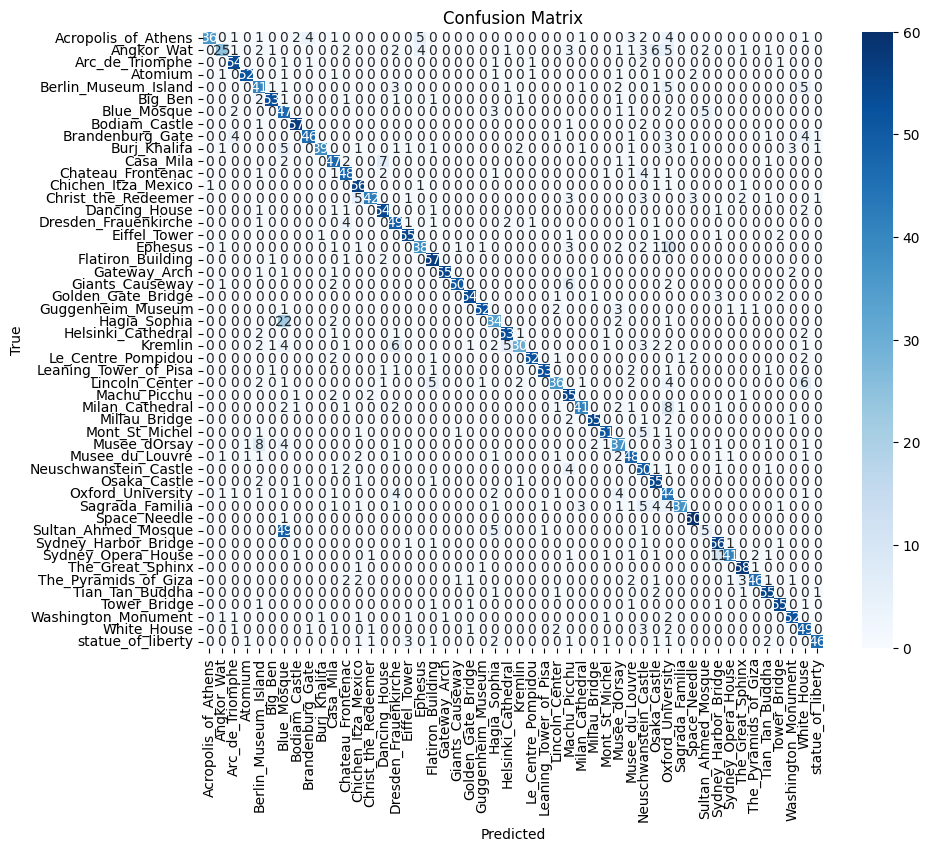

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os

os.makedirs("report_assets", exist_ok=True)
class_labels = list(test_generator.class_indices.keys())
true_classes = test_generator.classes
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

# --- Accuracy / Loss Curves ---
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig("report_assets/training_curves.png")
    plt.close()

plot_training_curves(history)

# --- Confusion Matrix ---
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("report_assets/confusion_matrix.png")
plt.close()

# --- Classification Report as Text ---
report = classification_report(true_classes, pred_classes, target_names=class_labels)
with open("report_assets/classification_report.txt", "w") as f:
    f.write(report)

# --- Sample Predictions ---
def save_sample_predictions():
    test_generator.reset()
    images, labels = next(test_generator)
    preds = model.predict(images)
    pred_classes_batch = np.argmax(preds, axis=1)
    true_classes_batch = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = class_labels[true_classes_batch[i]]
        pred_label = class_labels[pred_classes_batch[i]]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.tight_layout()
    plt.savefig("report_assets/sample_predictions.png")
    plt.close()

save_sample_predictions()


96/96 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


generate pdf with values

In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Image
from reportlab.lib.units import inch

def generate_pdf_report():
    c = canvas.Canvas("FamousPlaces_CNN_Report.pdf", pagesize=letter)
    width, height = letter

    c.setFont("Helvetica-Bold", 16)
    c.drawString(72, height - 72, "CNN Fine-Tuning Report: Famous Places Classification")

    c.setFont("Helvetica", 12)
    c.drawString(72, height - 100, "Model: MobileNetV2 + Custom Classifier")
    c.drawString(72, height - 120, f"Image Size: 224x224 | Batch Size: 32 | Epochs: {len(history.history['loss'])}")

    c.drawImage("report_assets/training_curves.png", 72, height - 400, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Confusion Matrix")
    c.drawImage("report_assets/confusion_matrix.png", 72, height - 450, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Sample Predictions")
    c.drawImage("report_assets/sample_predictions.png", 72, height - 500, width=5.5*inch, preserveAspectRatio=True)
    c.showPage()

    c.drawString(72, height - 72, "Classification Report")
    with open("report_assets/classification_report.txt", "r") as f:
        lines = f.readlines()

    text_object = c.beginText(72, height - 100)
    text_object.setFont("Helvetica", 10)
    for line in lines:
        text_object.textLine(line.strip())
    c.drawText(text_object)

    c.save()

generate_pdf_report()
